In [1]:
import torch
import matplotlib.pyplot as plt
import lstm_utils
import fclstm
import random

In [2]:
# Learning Rate
learning_rate = 1e-3
running_loss = []
BATCH_SIZE = 64
# Use Fully Connected LSTM?:
fc = True
logs_per_epoch = 10
num_epochs = 18
# MAX
_LEN = 500
PAD_BATCH_FLAG = True
train_loss = []
test_loss = []
use_gpu = torch.cuda.is_available()

train_dir = '/home/asilva/Data/aclImdb/train'
test_dir = '/home/asilva/Data/aclImdb/test'

In [3]:
use_gpu

True

In [4]:
dataset, word_to_id = lstm_utils.build_dataset_imdb(train=True)
vocab = len(word_to_id)
test_dataset, word_to_id_t = lstm_utils.build_dataset_imdb(train=False)

In [5]:
print(word_to_id['alright'])

946


In [6]:
# Sort for more efficient batching
dataset.sort(key=lambda x: len(x[0]), reverse=True)
test_dataset.sort(key=lambda x: len(x[0]), reverse=True)


In [7]:
if fc:
    model = fclstm.FCLSTM(vocab_size=vocab,
                           hidden_dim=512,
                           embed_dim=128,
                           num_layers=1,
                           num_classes=2,
                           dropout=0.4,
                           batch_size=BATCH_SIZE)
else:
    model = lstm_utils.Net(vocab_size=vocab,
                           hidden_dim=512,
                           embed_dim=128,
                           num_layers=1,
                           num_classes=2,
                           dropout=0.4,
                           batch_size=BATCH_SIZE)
loss_fn = torch.nn.NLLLoss()
if use_gpu:
    model = model.cuda()
    loss_fn = loss_fn.cuda()

In [8]:
# Lists to keep track of average train / test losses over time (for plotting)
step_size = BATCH_SIZE if PAD_BATCH_FLAG else 1
train_log_interval = len(dataset)/step_size/logs_per_epoch
test_log_interval = len(test_dataset)/step_size/logs_per_epoch

In [9]:
for epoch in range(1, num_epochs+1):
    # Training over all training data
    print('EPOCH:', epoch)
    if epoch < num_epochs/4:
        lr = learning_rate
    elif epoch < num_epochs/2:
        lr = learning_rate * 0.5
    else:
        lr = learning_rate * 0.1
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, betas=(0.7, 0.99))
    train_loss.extend(lstm_utils.pass_through(model,
                                              loss_fn,
                                              optimizer,
                                              dataset,
                                              batch=PAD_BATCH_FLAG,
                                              batch_size=BATCH_SIZE,
                                              train=True,
                                              log_every=train_log_interval))
    test_loss.extend(lstm_utils.pass_through(model,
                                             loss_fn,
                                             optimizer,
                                             test_dataset,
                                             batch=PAD_BATCH_FLAG,
                                             batch_size=BATCH_SIZE,
                                             train=False,
                                             log_every=test_log_interval))
    # Checkpoint the model with the state_dict, optimizer, and current epoch number
    lstm_utils.save_checkpoint({
        'epoch': epoch + 1,
        'state_dict': model.state_dict(),
        'optimizer': optimizer.state_dict(),
    }, filename='sentiment_epoch'+str(epoch+1))

('EPOCH:', 1)
Step 78 || Avg Loss: 0.686623841524
Step 156 || Avg Loss: 0.655509205965
Step 234 || Avg Loss: 0.540639139521
Step 312 || Avg Loss: 0.497603384348
Step 390 || Avg Loss: 0.459023484626
Step 468 || Avg Loss: 0.452339950662
Step 546 || Avg Loss: 0.398510616941
Step 624 || Avg Loss: 0.367069698297
Step 702 || Avg Loss: 0.359581107321
Step 780 || Avg Loss: 0.310864886699
('EPOCH:', 2)
Step 78 || Avg Loss: 0.329009207969
Step 156 || Avg Loss: 0.292726625617
Step 234 || Avg Loss: 0.253643899105
Step 312 || Avg Loss: 0.279482502681
Step 390 || Avg Loss: 0.265057143373
Step 468 || Avg Loss: 0.271811715256
Step 546 || Avg Loss: 0.254474552014
Step 624 || Avg Loss: 0.252441881272
Step 702 || Avg Loss: 0.244309995323
Step 780 || Avg Loss: 0.213488490058
('EPOCH:', 3)
Step 78 || Avg Loss: 0.234360287157
Step 156 || Avg Loss: 0.176823065306
Step 234 || Avg Loss: 0.169407272377
Step 312 || Avg Loss: 0.208312306386
Step 390 || Avg Loss: 0.182757374448
Step 468 || Avg Loss: 0.210277421997

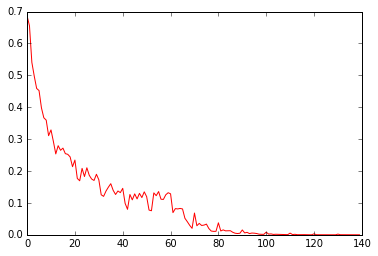

In [15]:
plt.plot(train_loss, 'r', test_loss, 'b')
# plt.plot(train_loss, 'r')

In [14]:
plt.savefig('avg_losses.png')

AttributeError: 'list' object has no attribute 'savefig'